In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error as mse

from google.colab import drive
drive.mount('/content/drive')
mydata_path = '/content/drive/MyDrive/Teaching/ML_Finance/Python/Data/'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
age = pd.read_csv(mydata_path + 'age_salary.csv')

In [5]:
age['X1'] = age['age']
age['X2'] = age['age'] ** 2
age['X3'] = age['age'] ** 3
age['X4'] = age['age'] ** 4
age['X5'] = age['age'] ** 5
age['Y'] = age['salary']
Z = age[['X1', 'X2', 'X3', 'X4', 'X5']]

Z = (Z - Z.mean())/Z.std()
Y = age['Y']/1000

Z

,X1,X2,X3,X4,X5
0,-1.289948,-1.128109,-0.988322,-0.873562,-0.782128
1,0.836340,0.778017,0.693166,0.592463,0.485972
2,-1.148195,-1.045510,-0.943059,-0.849996,-0.770351
3,-0.581185,-0.651577,-0.684372,-0.687799,-0.672266
4,1.190721,1.234693,1.246690,1.229979,1.190828
5,1.545102,1.731080,1.900602,2.048447,2.174155
6,0.127577,-0.016202,-0.146184,-0.252677,-0.333075
7,-0.226804,-0.353745,-0.448740,-0.510508,-0.544103
8,0.481958,0.361052,0.231663,0.107030,-0.004250
9,-0.935566,-0.909699,-0.861444,-0.803378,-0.744782


Text(0.5, 1.0, 'Ridge regression for $\\lambda$ = 0 (no regularaization)')

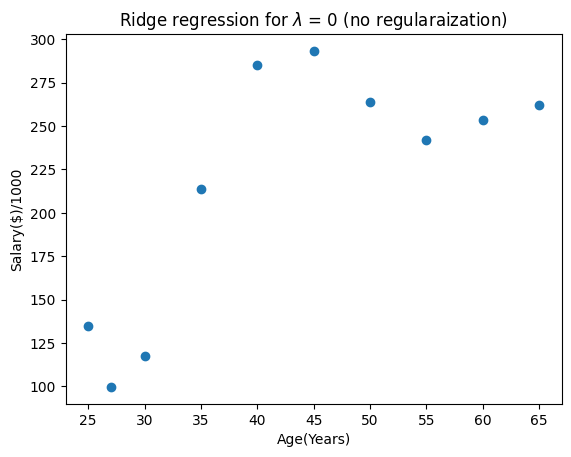

In [6]:
ridge1 = Ridge(alpha = 0)
ridge1.fit(Z,Y)
pred1 = ridge1.predict(Z)

plt.scatter(age['age'], pred1)
plt.xlabel('Age(Years)');
plt.ylabel('Salary($)/1000')
plt.title('Ridge regression for $\lambda$ = 0 (no regularaization)')


Text(0.5, 1.0, 'Ridge regression for $\\lambda$ = 0.02')

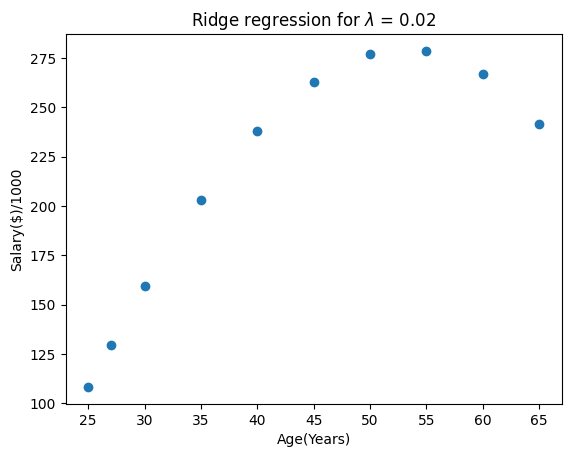

In [7]:
ridge2 = Ridge(alpha = 0.02)
ridge2.fit(Z,Y)
pred2 = ridge2.predict(Z)

plt.scatter(age['age'], pred2)
plt.xlabel('Age(Years)');
plt.ylabel('Salary($)/1000')
plt.title('Ridge regression for $\lambda$ = 0.02')


Text(0.5, 1.0, 'Ridge regression for $\\lambda$ = 0.1')

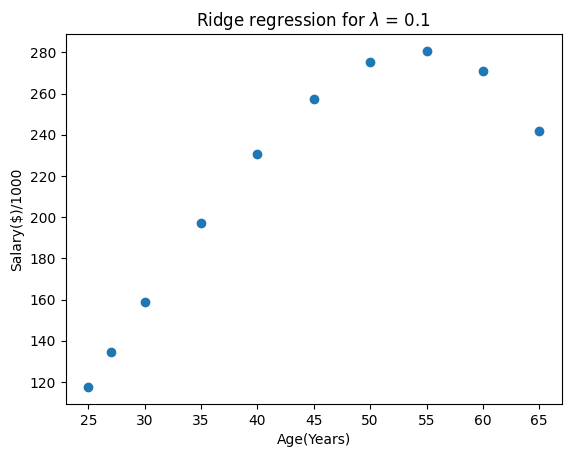

In [8]:
ridge3 = Ridge(alpha = 0.1)
ridge3.fit(Z,Y)
pred3 = ridge3.predict(Z)

plt.scatter(age['age'], pred3)
plt.xlabel('Age(Years)');
plt.ylabel('Salary($)/1000')
plt.title('Ridge regression for $\lambda$ = 0.1')


Text(0.5, 1.0, 'Lasso regression for $\\lambda$ = 0.02')

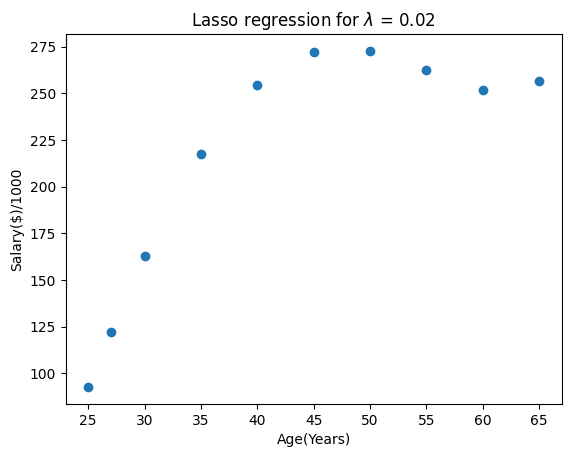

In [11]:
lasso1 = Lasso(alpha = 0.02, max_iter = 1100000)
lasso1.fit(Z, Y)

lasso_pred1 = lasso1.predict(Z)

plt.scatter(age['age'], lasso_pred1)
plt.xlabel('Age(Years)');
plt.ylabel('Salary($)/1000')
plt.title('Lasso regression for $\lambda$ = 0.02')


Text(0.5, 1.0, 'Lasso regression for $\\lambda$ = 0.1')

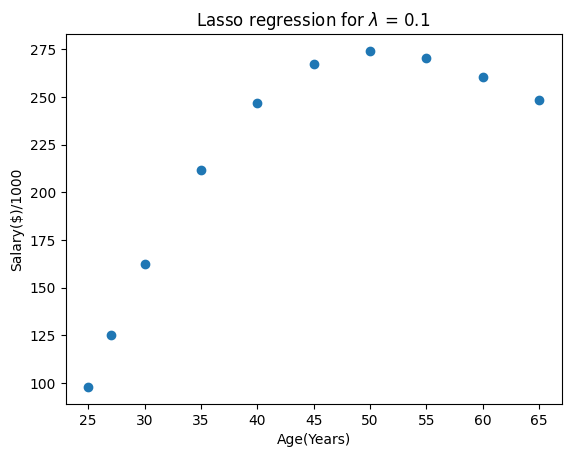

In [12]:
lasso2 = Lasso(alpha = 0.1, max_iter = 1100000)
lasso2.fit(Z, Y)

lasso_pred2 = lasso2.predict(Z)

plt.scatter(age['age'], lasso_pred2)
plt.xlabel('Age(Years)');
plt.ylabel('Salary($)/1000')
plt.title('Lasso regression for $\lambda$ = 0.1')


Text(0.5, 1.0, 'Lasso regression for $\\lambda$ = 1.00')

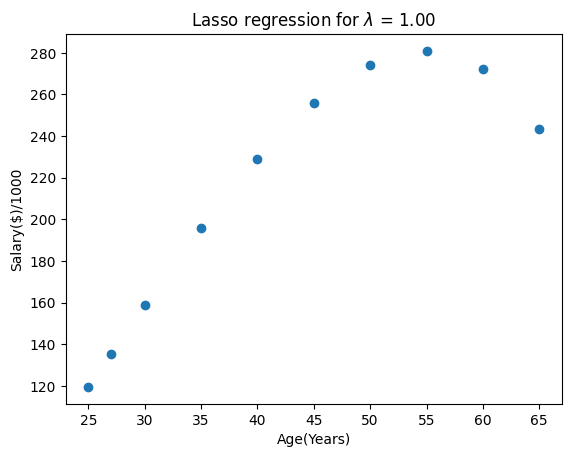

In [13]:
lasso3 = Lasso(alpha = 1, max_iter = 1000000)
lasso3.fit(Z, Y)

lasso_pred3 = lasso3.predict(Z)

plt.scatter(age['age'], lasso_pred3)
plt.xlabel('Age(Years)');
plt.ylabel('Salary($)/1000')
plt.title('Lasso regression for $\lambda$ = 1.00')


Text(0.5, 1.0, 'Elastic Net for $\\lambda_1$ = 0.02 and $\\lambda_2 = 1$')

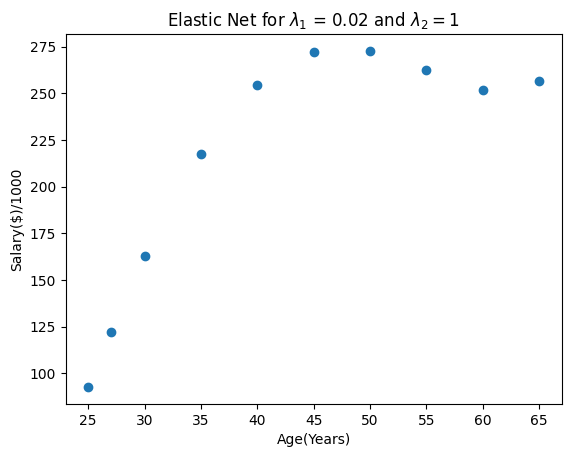

In [14]:
elt = ElasticNet(alpha=0.02, l1_ratio= 1, max_iter = 1000000)
elt.fit(Z,Y)

elt_pred = elt.predict(Z)

plt.scatter(age['age'], elt_pred)
plt.xlabel('Age(Years)');
plt.ylabel('Salary($)/1000')
plt.title('Elastic Net for $\lambda_1$ = 0.02 and $\lambda_2 = 1$')


## House price example

In [15]:
data = pd.read_csv(mydata_path + 'Houseprice_data_scaled.csv')

train = data.iloc[:1800]
val = data.iloc[1800:2400]
test=data.iloc[2400:2908]

X_train, X_val,X_test = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1), test.drop('Sale Price', axis=1)
y_train, y_val,y_test = train[['Sale Price']], val[['Sale Price']], test[['Sale Price']]

data.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,OLDTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Bsmt Qual,Sale Price
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.358489
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,10.905682,0.584308,0.008849
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.552733
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.528560
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.895898


In [16]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_train)
print(mse(y_train,pred))
pred=lr.predict(X_val)
print(mse(y_val,pred))


0.11401526431246337
0.11702499460121657


In [17]:
lr_coeff = pd.DataFrame([['intercept'] + list(X_train.columns),list(lr.intercept_) + list(lr.coef_[0])])
lr_coeff.T

,0,1
0,intercept,-0.0
1,LotArea,0.079
2,OverallQual,0.214395
3,OverallCond,0.096479
4,YearBuilt,0.160799
5,YearRemodAdd,0.025352
6,BsmtFinSF1,0.091466
7,BsmtUnfSF,-0.03308
8,TotalBsmtSF,0.138199
9,1stFlrSF,0.152786


0.11703284346091365
0.11710797319753014
0.11723952924901136
0.11741457158889529
0.11762384068711469
0.11825709631198032
0.11900057469147939
0.12254649996292959
0.13950882506243753
0.15786905738744897


Text(0.5, 1.0, 'MSE of Validation(Ridge)')

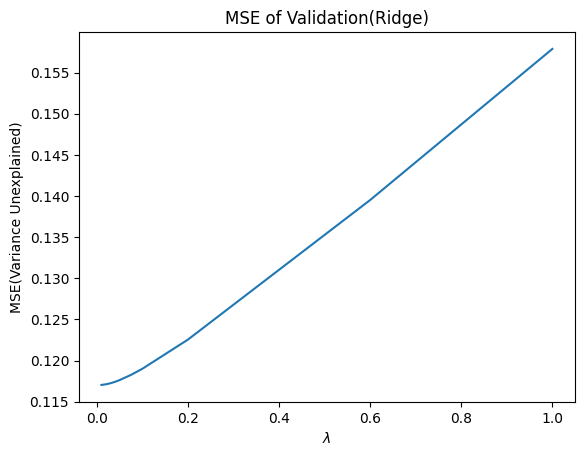

In [18]:
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.6*1800, 1.0*1800]
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val,pred))
sum_ridge = pd.DataFrame([alphas, mses], index = ['lm', 'mses']).T
sum_ridge['lambda'] = sum_ridge['lm']/1800
sum_ridge = sum_ridge[['lambda', 'mses']]

plt.plot(sum_ridge['lambda'], sum_ridge['mses'])
plt.xlabel('$\lambda$')
plt.ylabel('MSE(Variance Unexplained)')
plt.title('MSE of Validation(Ridge)')

0.11654751909608793
0.11682687945311097
0.11803348353132033
0.12012836764958999
0.12301536903084047
0.13178576395045638
0.1401719458448378


Text(0.5, 1.0, 'MSE of Validation(Lasso)')

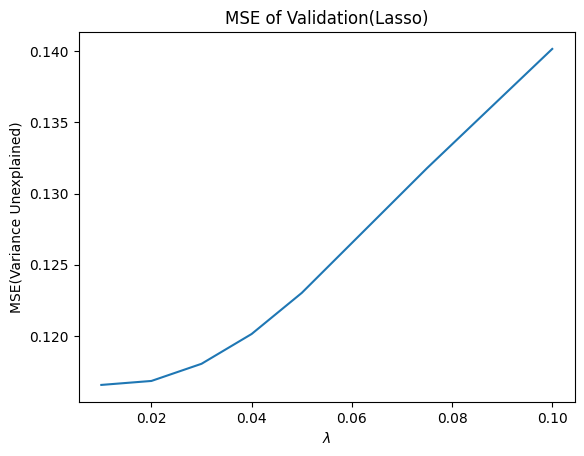

In [19]:
alphas2=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses2=[]
for alpha in alphas2:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    mses2.append(mse(y_val,pred))
    print(mse(y_val, pred))

sum_lasso = pd.DataFrame([alphas2, mses2], index = ['lm', 'mses']).T
sum_lasso['lambda'] = sum_lasso['lm']*2
sum_lasso = sum_lasso[['lambda', 'mses']]

plt.plot(sum_lasso['lambda'], sum_lasso['mses'])
plt.xlabel('$\lambda$')
plt.ylabel('MSE(Variance Unexplained)')
plt.title('MSE of Validation(Lasso)')

Text(0.5, 1.0, 'MSE of Validation(Lasso)')

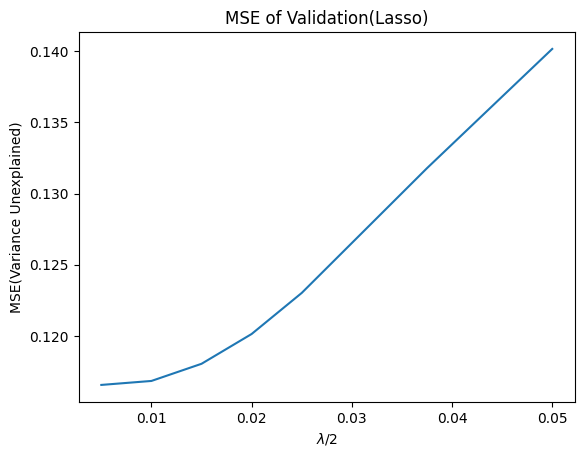

In [20]:
plt.plot(alphas2, mses2)
plt.xlabel('$\lambda / 2$')
plt.ylabel('MSE(Variance Unexplained)')
plt.title('MSE of Validation(Lasso)')


In [21]:
lasso_final = Lasso(alpha=0.01)
lasso_final.fit(X_train, y_train)

coeffs = pd.DataFrame([['intercept'] + list(X_train.columns),list(lasso.intercept_) + list(lasso.coef_)]).T

coeffs


#aaa = coeffs[~coeffs[1] == 0]

,0,1
0,intercept,-0.0
1,LotArea,0.044304
2,OverallQual,0.298079
3,OverallCond,0.0
4,YearBuilt,0.052091
5,YearRemodAdd,0.064471
6,BsmtFinSF1,0.115875
7,BsmtUnfSF,-0.0
8,TotalBsmtSF,0.10312
9,1stFlrSF,0.032295


In [22]:
alpha=0.04/2
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
pred=lasso.predict(X_test)
print(mse(y_test,pred))

0.12541988653891772


In [23]:
alpha=0.1/2
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
pred=lasso.predict(X_test)
print(mse(y_test,pred))

0.14720538902033134


## Logistic Regression (Lending Club Data)

In [45]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

train = pd.read_excel(mydata_path +'lendingclub_traindata.xlsx')
validation=pd.read_excel(mydata_path +'lendingclub_valdata.xlsx')
test = pd.read_excel(mydata_path +'lendingclub_testdata.xlsx')

In [46]:
train.head()

,home_ownership,income,dti,fico,loan_status
0,1,44304.0,18.47,690,0
1,0,50000.0,29.62,735,1
2,0,64400.0,16.68,675,1
3,0,38500.0,33.73,660,0
4,1,118000.0,26.66,665,1


In [47]:
# remove target column to create feature only dataset
X_train = train.drop('loan_status', axis = 1)
X_val= validation.drop('loan_status', axis = 1)
X_test = test.drop('loan_status', axis = 1)

# Scale data using the mean and standard deviation of the training set.
# This is not necessary for the simple logistic regression we will do here
# but should be done if L1 or L2 regrularization is carried out
X_test=(X_test-X_train.mean())/X_train.std()
X_val=(X_val-X_train.mean())/X_train.std()
X_train=(X_train-X_train.mean())/X_train.std()

# store target column as y-variables
y_train = train['loan_status']
y_val=validation['loan_status']
y_test = test['loan_status']

In [54]:
logi_reg = LogisticRegression(penalty = None, solver = 'newton-cg')
logi_reg.fit(X_train, y_train)

print(logi_reg.intercept_, logi_reg.coef_)

[1.41622043] [[ 0.14529381  0.03361951 -0.32404237  0.363174  ]]


In [55]:
import statsmodels.api as sm

newx = sm.add_constant(X_train)
model = sm.Logit(y_train, newx)
result = model.fit(method='newton')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.491111
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6995
Method:                           MLE   Df Model:                            4
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                 0.04019
Time:                        11:57:26   Log-Likelihood:                -3437.8
converged:                       True   LL-Null:                       -3581.7
Covariance Type:            nonrobust   LLR p-value:                 4.387e-61
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4162      0.032     44.799      0.000       1.354       1.478
home_ownership   

In [58]:
y_train_pred = logi_reg.predict_proba(X_train)
y_val_pred = logi_reg.predict_proba(X_val)
y_test_pred = logi_reg.predict_proba(X_test)

# Calculate maximum likelihood for training set, validation set, and test set

mle_vector_train = np.log(np.where(y_train == 1, y_train_pred[:,1], y_train_pred[:,0]))
mle_vector_val = np.log(np.where(y_val == 1, y_val_pred[:,1], y_val_pred[:,0]))
mle_vector_test = np.log(np.where(y_test == 1, y_test_pred[:,1], y_test_pred[:,0]))

# Calculate cost functions from maximum likelihoods

cost_function_training=np.negative(np.sum(mle_vector_train)/len(y_train))
cost_function_val=np.negative(np.sum(mle_vector_val)/len(y_val))
cost_function_test=np.negative(np.sum(mle_vector_test)/len(y_test))

print('cost function training set =', cost_function_training)
print('cost function validation set =', cost_function_val)
print('cost function test set =', cost_function_test)

cost function training set = 0.4911114356066864
cost function validation set = 0.48607087962794676
cost function test set = 0.48466984479475067


In [59]:
pred1 = np.where(logi_reg.predict_proba(X_test)[:,1] > 0.75, 1, 0)
cm1 = (confusion_matrix(y_test, pred1, labels = [1,0], sample_weight = None)/len(y_test))*100
pred2 = np.where(logi_reg.predict_proba(X_test)[:,1] > 0.80, 1, 0)
cm2 = (confusion_matrix(y_test, pred2, labels = [1,0], sample_weight = None)/len(y_test))*100
pred3 = np.where(logi_reg.predict_proba(X_test)[:,1] > 0.85, 1, 0)
cm3 = (confusion_matrix(y_test, pred3, labels = [1,0], sample_weight = None)/len(y_test))*100



cm11 = pd.DataFrame(cm1, columns = ['Predict No Default', 'Predict Default'], index = ['Outcome No Default', 'Outcome Default'])
cm11.index.name = 'Z= 0.75'
cm21 = pd.DataFrame(cm2, columns = ['Predict No Default', 'Predict Default'], index = ['Outcome No Default', 'Outcome Default'])
cm21.index.name = 'Z = 0.80'
cm31 = pd.DataFrame(cm3, columns = ['Predict No Default', 'Predict Default'], index = ['Outcome No Default', 'Outcome Default'])
cm31.index.name = 'Z = 0.85'


print(cm11)
print(cm21)
print(cm31)

                    Predict No Default  Predict Default
Z= 0.75                                                
Outcome No Default           60.829694        18.340611
Outcome Default              11.703057         9.126638
                    Predict No Default  Predict Default
Z = 0.80                                               
Outcome No Default           42.707424        36.462882
Outcome Default               6.462882        14.366812
                    Predict No Default  Predict Default
Z = 0.85                                               
Outcome No Default           22.751092        56.419214
Outcome Default               3.013100        17.816594


In [61]:
THRESHOLD = [0, .75, .80, .85, 1]

results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results

results['THRESHOLD'] = THRESHOLD

j = 0

for i in THRESHOLD:
    preds = np.where(logi_reg.predict_proba(X_test)[:,1] > i, 1, 0)
    cm = (confusion_matrix(y_test, preds, labels = [1,0], sample_weight = None)/len(y_test))*100
    print(cm)
    TP = cm[0][0]
    FN = cm[0][1]
    FP = cm[1][0]
    TN = cm[1][1]
    results.iloc[j,1] = accuracy_score(y_test, preds)
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)
    results.iloc[j,4] = FP/(FP+TN)
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)

    j += 1

results.T


[[79.17030568  0.        ]
 [20.82969432  0.        ]]
[[60.82969432 18.34061135]
 [11.70305677  9.12663755]]
[[42.70742358 36.4628821 ]
 [ 6.4628821  14.36681223]]
[[22.7510917  56.41921397]
 [ 3.01310044 17.81659389]]
[[ 0.         79.17030568]
 [ 0.         20.82969432]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0,1,2,3,4
THRESHOLD,0.0,0.75,0.8,0.85,1.0
accuracy,0.791703,0.699563,0.570742,0.405677,0.208297
true pos rate,1.0,0.76834,0.539437,0.287369,0.0
true neg rate,0.0,0.438155,0.689727,0.855346,1.0
false pos rate,1.0,0.561845,0.310273,0.144654,0.0
precision,0.791703,0.838651,0.868561,0.883051,0.0
f-score,0.883744,0.801957,0.665532,0.433625,0.0


AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.6577663531841429


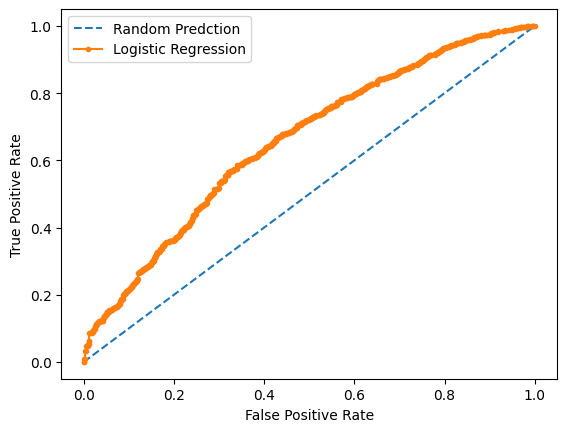

In [62]:
lr_prob = logi_reg.predict_proba(X_test)
lr_prob = lr_prob[:,1]
ns_prob = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test, ns_prob)
lr_auc=roc_auc_score(y_test,lr_prob)
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =", lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_prob)
plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()